In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 16})

In [2]:
# data preparation
data_train = pd.read_csv("data/data_train.csv")
data_train.head()

,x_1,x_2,y
0,0.189645,-27.017739,0
1,0.692067,-9.033156,0
2,-1.003673,-30.560446,0
3,0.149332,-51.732407,0
4,0.132216,-13.741323,0


In [3]:
data_test = pd.DataFrame({"x_1": [0.5],
                          "x_2": [29.0]})
data_test

,x_1,x_2
0,0.5,29.0


In [4]:
# testtesttest

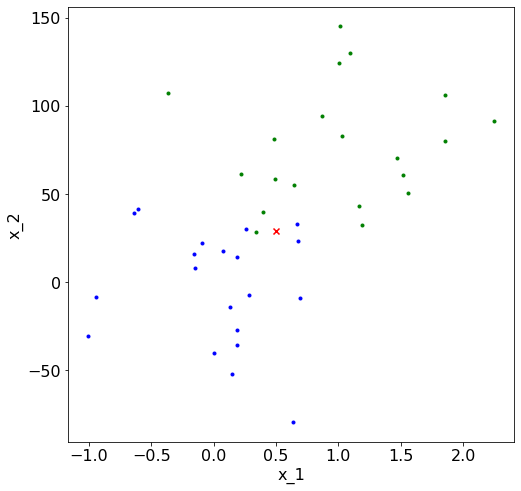

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

data_class_0 = data_train[data_train["y"]==0]
data_class_1 = data_train[data_train["y"]==1]
ax.scatter(data_class_0["x_1"], data_class_0["x_2"], c='b', marker='.')
ax.scatter(data_class_1["x_1"], data_class_1["x_2"], c='g', marker='.')
ax.scatter(data_test["x_1"], data_test["x_2"], marker='x', c='r')

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
plt.show()

## 1. Buat fungsi KNN

Input:
- `X_test`, data yang ingin diprediksi
- `X_train`, data train input
- `y_train`, data train output
- `k`, jumlah k-observasi terdekat untuk setiap `data_test`

Output:
- `majority vote`, hasil vote class yang memiliki proporsi terbesar
- `indeks_tetangga`, indeks tetangga data test

Analisa:
- lakukan prediksi saat `k = 3`
- lakukan prediksi saat `k = 5`

In [6]:
# create fungsi knn
def knn(X_test,
        X_train, 
        y_train,
        k):
    """
    Fungsi untuk membuat model k Nearest Neighbor
    :param X_test: <pandas dataframe> data input yang ingin diprediksi
    :param X_train: <pandas dataframe> data input yang dipakai untuk mencari k-observasi
    :param y_train: <pandas dataframe> data output yang dipakai untuk mencari k-observasi
    :param k: <int> jumlah tetangga terdekat
    :return majority_vote: <class> 1 atau 0
    :return indeks_tetangga: <list> kumpulan k-tetangga terdekat
    """
    # 1. Cari jarak tiap observasi ke target terdekat
    n = len(X_train)
    list_jarak = np.zeros(n)

    for i in X_train.index:
        # Lakukan pencarian jarak berbasis Euclidean
        jarak_square = (X_train["x_1"].loc[i] - X_test["x_1"])**2 \
                       + (X_train["x_2"].loc[i] - X_test["x_2"])**2
        jarak_ = np.sqrt(jarak_square)
        list_jarak[i] = jarak_ 

    # 2. Cari k tetangga terdekat
    indeks_tetangga = list(np.argsort(list_jarak)[:k])
    X_tetangga = X_train.loc[indeks_tetangga]
    y_tetangga = y_train.loc[indeks_tetangga]

    # 3. Buat hasil prediksi
    # Klasfikasi adalah mencari kelas
    majority_vote = y_tetangga.value_counts(normalize=True).index[0]
    
    return majority_vote, indeks_tetangga


In [7]:
# saat K = 3
y_test_predict, indeks_tetangga = knn(X_test = data_test,
                                      X_train = data_train[["x_1", "x_2"]],
                                      y_train = data_train["y"],
                                      k = 3)

data_test["y"] = y_test_predict
data_test

,x_1,x_2,y
0,0.5,29.0,1


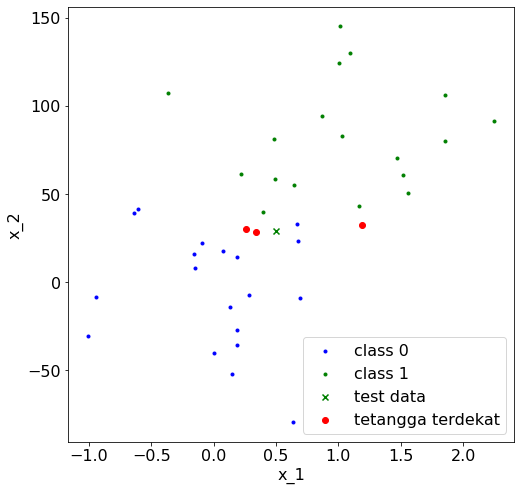

In [8]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Display data
data_class_0 = data_train[data_train["y"]==0]
data_class_1 = data_train[data_train["y"]==1]
ax.scatter(data_class_0["x_1"], data_class_0["x_2"], c='b', marker='.', label="class 0")
ax.scatter(data_class_1["x_1"], data_class_1["x_2"], c='g', marker='.', label="class 1")

# Display Test
if data_test["y"][0]==0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"], marker='x', c=color_test, label="test data")

# Display Tetangga
ax.scatter(data_train["x_1"].loc[indeks_tetangga], 
           data_train["x_2"].loc[indeks_tetangga],
           marker="o",
           c = 'r', label = "tetangga terdekat")

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
# ax.axis("equal")
plt.legend()
plt.show()

In [9]:
# saat K = 5
y_test_predict, indeks_tetangga = knn(X_test = data_test,
                                      X_train = data_train[["x_1", "x_2"]],
                                      y_train = data_train["y"],
                                      k = 5)

data_test["y"] = y_test_predict
data_test

,x_1,x_2,y
0,0.5,29.0,0


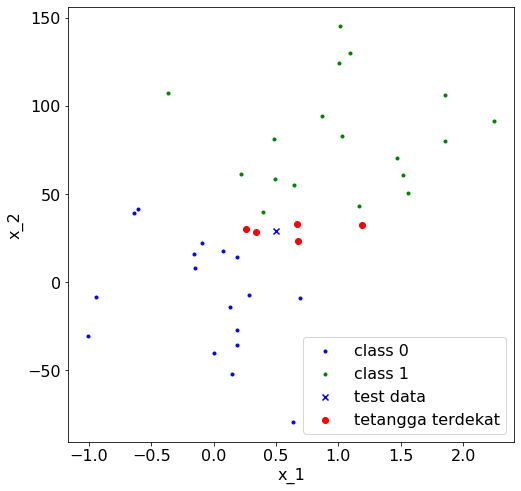

In [10]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Display data
data_class_0 = data_train[data_train["y"]==0]
data_class_1 = data_train[data_train["y"]==1]
ax.scatter(data_class_0["x_1"], data_class_0["x_2"], c='b', marker='.', label="class 0")
ax.scatter(data_class_1["x_1"], data_class_1["x_2"], c='g', marker='.', label="class 1")

# Display Test
if data_test["y"][0]==0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"], marker='x', c=color_test, label="test data")

# Display Tetangga
ax.scatter(data_train["x_1"].loc[indeks_tetangga], 
           data_train["x_2"].loc[indeks_tetangga],
           marker="o",
           c = 'r', label = "tetangga terdekat")

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
# ax.axis("equal")
plt.legend()
plt.show()

## 2. Tambahkan standardisasi data

Input:
- `X_test`, data yang ingin diprediksi
- `X_train`, data train input
- `y_train`, data train output
- `k`, jumlah k-observasi terdekat untuk setiap `data_test`
- `standardize`, true or false

Output:
- `majority vote`, hasil vote class yang memiliki proporsi terbesar
- `indeks_tetangga`, indeks tetangga data test

Analisa:
- lakukan prediksi saat `k = 3`
- lakukan prediksi saat `k = 5`

In [11]:
def knn(X_test,
        X_train, 
        y_train,
        k,
        standardize):
    """
    Fungsi untuk membuat model k Nearest Neighbor
    :param X_test: <pandas dataframe> data input yang ingin diprediksi
    :param X_train: <pandas dataframe> data input yang dipakai untuk mencari k-observasi
    :param y_train: <pandas dataframe> data output yang dipakai untuk mencari k-observasi
    :param k: <int> jumlah tetangga terdekat
    :param standardize: <bool> true di standardisasikan
    :return majority_vote: <class> 1 atau 0
    :return indeks_tetangga: <list> kumpulan k-tetangga terdekat
    """
    # 1. Lakukan standardisasi if standardize = true
    if standardize:
        # cari mean & variance masing-masing fitur data training
        mean_train = np.mean(X_train, axis=0)
        std_train = np.std(X_train, axis=0)

        # transformasi X_train & X_test
        X_train = (X_train - mean_train)/std_train
        X_test = (X_test - mean_train)/std_train

    # 1. Cari jarak tiap observasi ke target terdekat
    n = len(X_train)
    list_jarak = np.zeros(n)

    for i in X_train.index:
        # Lakukan pencarian jarak berbasis Euclidean
        jarak_square = (X_train["x_1"].loc[i] - X_test["x_1"])**2 \
                       + (X_train["x_2"].loc[i] - X_test["x_2"])**2
        jarak_ = np.sqrt(jarak_square)
        list_jarak[i] = jarak_ 

    # 2. Cari k tetangga terdekat
    indeks_tetangga = list(np.argsort(list_jarak)[:k])
    X_tetangga = X_train.loc[indeks_tetangga]
    y_tetangga = y_train.loc[indeks_tetangga]

    # 3. Buat hasil prediksi
    # Klasfikasi adalah mencari kelas
    majority_vote = y_tetangga.value_counts(normalize=True).index[0]
    
    return majority_vote, indeks_tetangga


In [12]:
# saat K = 3
y_test_predict, indeks_tetangga = knn(X_test = data_test,
                                      X_train = data_train[["x_1", "x_2"]],
                                      y_train = data_train["y"],
                                      k = 3,
                                      standardize = True)

data_test["y"] = y_test_predict
data_test

,x_1,x_2,y
0,0.5,29.0,1


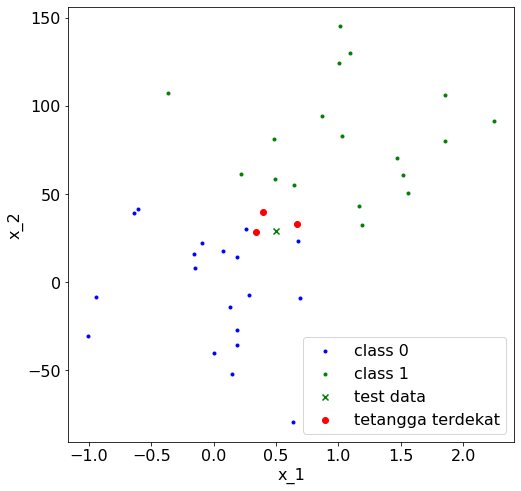

In [13]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Display data
data_class_0 = data_train[data_train["y"]==0]
data_class_1 = data_train[data_train["y"]==1]
ax.scatter(data_class_0["x_1"], data_class_0["x_2"], c='b', marker='.', label="class 0")
ax.scatter(data_class_1["x_1"], data_class_1["x_2"], c='g', marker='.', label="class 1")

# Display Test
if data_test["y"][0]==0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"], marker='x', c=color_test, label="test data")

# Display Tetangga
ax.scatter(data_train["x_1"].loc[indeks_tetangga], 
           data_train["x_2"].loc[indeks_tetangga],
           marker="o",
           c = 'r', label = "tetangga terdekat")

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
# ax.axis("equal")
plt.legend()
plt.show()

In [14]:
# saat K = 5
y_test_predict, indeks_tetangga = knn(X_test = data_test,
                                      X_train = data_train[["x_1", "x_2"]],
                                      y_train = data_train["y"],
                                      k = 5,
                                      standardize = True)

data_test["y"] = y_test_predict
data_test

,x_1,x_2,y
0,0.5,29.0,0


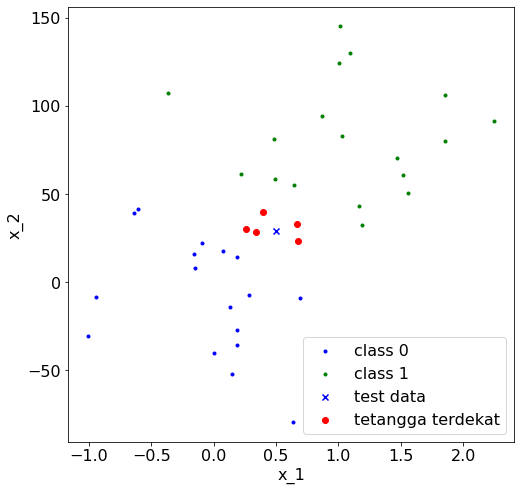

In [15]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Display data
data_class_0 = data_train[data_train["y"]==0]
data_class_1 = data_train[data_train["y"]==1]
ax.scatter(data_class_0["x_1"], data_class_0["x_2"], c='b', marker='.', label="class 0")
ax.scatter(data_class_1["x_1"], data_class_1["x_2"], c='g', marker='.', label="class 1")

# Display Test
if data_test["y"][0]==0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"], marker='x', c=color_test, label="test data")

# Display Tetangga
ax.scatter(data_train["x_1"].loc[indeks_tetangga], 
           data_train["x_2"].loc[indeks_tetangga],
           marker="o",
           c = 'r', label = "tetangga terdekat")

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
# ax.axis("equal")
plt.legend()
plt.show()

## 3. Tambahkan fungsi distance lain

Input:
- `X_test`, data yang ingin diprediksi
- `X_train`, data train input
- `y_train`, data train output
- `k`, jumlah k-observasi terdekat untuk setiap `data_test`
- `standardize`, true or false
- `distance_func`, `euclidean` atau `manhattan`

Output:
- `majority vote`, hasil vote class yang memiliki proporsi terbesar
- `indeks_tetangga`, indeks tetangga data test

Analisa:
- lakukan prediksi saat `k = 3`
- lakukan prediksi saat `k = 5`

In [16]:
def knn(X_test,
        X_train, 
        y_train,
        k,
        standardize,
        distance_func):
    """
    Fungsi untuk membuat model k Nearest Neighbor
    :param X_test: <pandas dataframe> data input yang ingin diprediksi
    :param X_train: <pandas dataframe> data input yang dipakai untuk mencari k-observasi
    :param y_train: <pandas dataframe> data output yang dipakai untuk mencari k-observasi
    :param k: <int> jumlah tetangga terdekat
    :param standardize: <bool> true di standardisasikan
    :param distance_func: <str> 'euclidean' dan 'manhattan'
    :return majority_vote: <class> 1 atau 0
    :return indeks_tetangga: <list> kumpulan k-tetangga terdekat
    """
    # 1. Lakukan standardisasi if standardize = true
    if standardize:
        # cari mean & variance masing-masing fitur data training
        mean_train = np.mean(X_train, axis=0)
        std_train = np.std(X_train, axis=0)

        # transformasi X_train & X_test
        X_train = (X_train - mean_train)/std_train
        X_test = (X_test - mean_train)/std_train

    # 1. Cari jarak tiap observasi ke target terdekat
    n = len(X_train)
    list_jarak = np.zeros(n)

    for i in X_train.index:
        # Lakukan pencarian jarak berbasis Euclidean
        # PILIHAN JARAK
        if distance_func == "euclidean":
            jarak_square = (X_train["x_1"].loc[i] - X_test["x_1"])**2 \
                            + (X_train["x_2"].loc[i] - X_test["x_2"])**2
            jarak_ = np.sqrt(jarak_square)
        elif distance_func == "manhattan":
            jarak_ = abs(X_train["x_1"].loc[i] - X_test["x_1"]) \
                     + abs(X_train["x_2"].loc[i] - X_test["x_2"])
 
        list_jarak[i] = jarak_ 

    # 2. Cari k tetangga terdekat
    indeks_tetangga = list(np.argsort(list_jarak)[:k])
    X_tetangga = X_train.loc[indeks_tetangga]
    y_tetangga = y_train.loc[indeks_tetangga]

    # 3. Buat hasil prediksi
    # Klasfikasi adalah mencari kelas
    majority_vote = y_tetangga.value_counts(normalize=True).index[0]
    
    return majority_vote, indeks_tetangga


In [17]:
# saat K = 3
y_test_predict, indeks_tetangga = knn(X_test = data_test,
                                      X_train = data_train[["x_1", "x_2"]],
                                      y_train = data_train["y"],
                                      k = 3,
                                      standardize = False,
                                      distance_func = "euclidean")

data_test["y"] = y_test_predict
data_test

,x_1,x_2,y
0,0.5,29.0,1


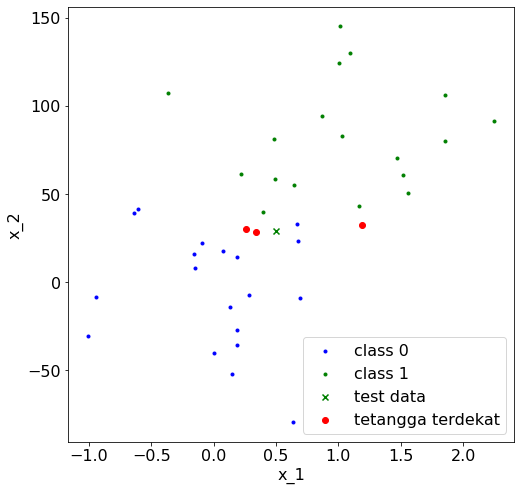

In [18]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Display data
data_class_0 = data_train[data_train["y"]==0]
data_class_1 = data_train[data_train["y"]==1]
ax.scatter(data_class_0["x_1"], data_class_0["x_2"], c='b', marker='.', label="class 0")
ax.scatter(data_class_1["x_1"], data_class_1["x_2"], c='g', marker='.', label="class 1")

# Display Test
if data_test["y"][0]==0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"], marker='x', c=color_test, label="test data")

# Display Tetangga
ax.scatter(data_train["x_1"].loc[indeks_tetangga], 
           data_train["x_2"].loc[indeks_tetangga],
           marker="o",
           c = 'r', label = "tetangga terdekat")

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
# ax.axis("equal")
plt.legend()
plt.show()

In [19]:
# saat K = 5
y_test_predict, indeks_tetangga = knn(X_test = data_test,
                                      X_train = data_train[["x_1", "x_2"]],
                                      y_train = data_train["y"],
                                      k = 5,
                                      standardize = True,
                                      distance_func = "manhattan")

data_test["y"] = y_test_predict
data_test

,x_1,x_2,y
0,0.5,29.0,0


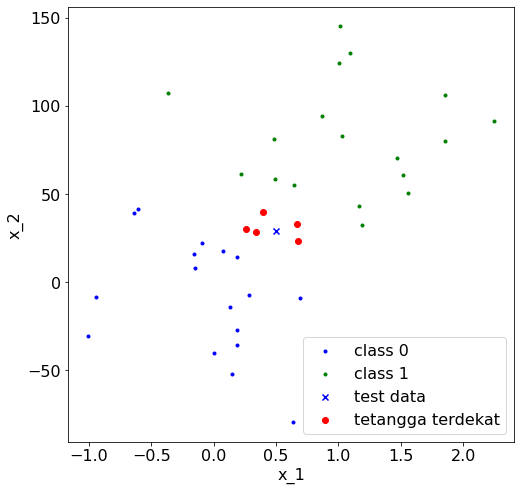

In [20]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Display data
data_class_0 = data_train[data_train["y"]==0]
data_class_1 = data_train[data_train["y"]==1]
ax.scatter(data_class_0["x_1"], data_class_0["x_2"], c='b', marker='.', label="class 0")
ax.scatter(data_class_1["x_1"], data_class_1["x_2"], c='g', marker='.', label="class 1")

# Display Test
if data_test["y"][0]==0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"], marker='x', c=color_test, label="test data")

# Display Tetangga
ax.scatter(data_train["x_1"].loc[indeks_tetangga], 
           data_train["x_2"].loc[indeks_tetangga],
           marker="o",
           c = 'r', label = "tetangga terdekat")

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
# ax.axis("equal")
plt.legend()
plt.show()

## 4. Buat fungsi KNN dengan lebih bagus

- buat fungsi khusus `standardizer`
- buat fungsi menghitung jarak

In [21]:
# Buat fungsi standardisasi
def standardizer(data_train, data_test):
    """
    Fungsi untuk melakukan standardisasi dari data_train & data_test
    :param data_train: <pandas DataFrame> input train
    :param data_test: <pandas DataFrame> input test
    :return data_train_new: <pandas DataFrame> new input train
    :return data_test_new: <pandas DataFrame> new input test
    """
    # cari mean & variance masing-masing fitur data training
    mean_train = np.mean(data_train, axis=0)
    std_train = np.std(data_train, axis=0)

    # transformasi X_train & X_test
    data_train_new = (data_train - mean_train)/std_train
    data_test_new = (data_test - mean_train)/std_train

    return data_train_new, data_test_new
    

In [22]:
# Buat fungsi jarak
def calculate_distance(a, b, distance_func):
    """
    Fungsi untuk menghitung jarak a & b
    :param a: <list> titik a
    :param b: <list> titik b
    :param distance_func: <str> "euclidean" atau "mahattan"
    :return dist: <float> distance antara a-b
    """
    if distance_func == "euclidean":
        dist_square = 0
        for i in a.index:
            dist_square += (a[i] - b[i])**2
        
        dist = np.sqrt(dist_square)

    elif distance_func == "manhattan":
        dist = 0
        for i in a.index:
            dist += abs(a[i] - b[i])

    return dist


In [23]:
def knn(X_test,
        X_train, 
        y_train,
        k,
        standardize,
        distance_func):
    """
    Fungsi untuk membuat model k Nearest Neighbor
    :param X_test: <pandas dataframe> data input yang ingin diprediksi
    :param X_train: <pandas dataframe> data input yang dipakai untuk mencari k-observasi
    :param y_train: <pandas dataframe> data output yang dipakai untuk mencari k-observasi
    :param k: <int> jumlah tetangga terdekat
    :param standardize: <bool> true di standardisasikan
    :param distance_func: <str> 'euclidean' dan 'manhattan'
    :return majority_vote: <class> 1 atau 0
    :return indeks_tetangga: <list> kumpulan k-tetangga terdekat
    """
    # 1. Lakukan standardisasi if standardize = true
    if standardize:
        X_train, X_test = standardizer(data_train = X_train, 
                                       data_test = X_test)

    # 1. Cari jarak tiap observasi ke target terdekat
    n = len(X_train)
    list_jarak = np.zeros(n)

    for i in X_train.index:
        # Lakukan pencarian jarak berbasis Euclidean
        # PILIHAN JARAK
        titik_1 = X_train.loc[i]
        titik_2 = X_test
        jarak_ = calculate_distance(a = titik_1, 
                                    b = titik_2, 
                                    distance_func = distance_func) 
        list_jarak[i] = jarak_ 

    # 2. Cari k tetangga terdekat
    indeks_tetangga = list(np.argsort(list_jarak)[:k])
    X_tetangga = X_train.loc[indeks_tetangga]
    y_tetangga = y_train.loc[indeks_tetangga]

    # 3. Buat hasil prediksi
    # Klasfikasi adalah mencari kelas
    majority_vote = y_tetangga.value_counts(normalize=True).index[0]
    
    return majority_vote, indeks_tetangga


In [24]:
# saat K = 3
y_test_predict, indeks_tetangga = knn(X_test = data_test,
                                      X_train = data_train[["x_1", "x_2"]],
                                      y_train = data_train["y"],
                                      k = 3,
                                      standardize = False,
                                      distance_func = "euclidean")

data_test["y"] = y_test_predict
data_test

,x_1,x_2,y
0,0.5,29.0,1


In [25]:
y_test_predict, indeks_tetangga = knn(X_test = data_test,
                                      X_train = data_train[["x_1", "x_2"]],
                                      y_train = data_train["y"],
                                      k = 3,
                                      standardize = False,
                                      distance_func = "manhattan")

data_test["y"] = y_test_predict
data_test

,x_1,x_2,y
0,0.5,29.0,0


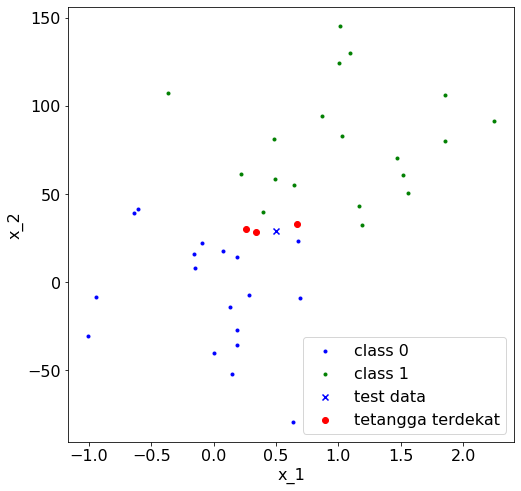

In [26]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Display data
data_class_0 = data_train[data_train["y"]==0]
data_class_1 = data_train[data_train["y"]==1]
ax.scatter(data_class_0["x_1"], data_class_0["x_2"], c='b', marker='.', label="class 0")
ax.scatter(data_class_1["x_1"], data_class_1["x_2"], c='g', marker='.', label="class 1")

# Display Test
if data_test["y"][0]==0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"], marker='x', c=color_test, label="test data")

# Display Tetangga
ax.scatter(data_train["x_1"].loc[indeks_tetangga], 
           data_train["x_2"].loc[indeks_tetangga],
           marker="o",
           c = 'r', label = "tetangga terdekat")

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
# ax.axis("equal")
plt.legend()
plt.show()

In [27]:
# saat K = 5
y_test_predict, indeks_tetangga = knn(X_test = data_test,
                                      X_train = data_train[["x_1", "x_2"]],
                                      y_train = data_train["y"],
                                      k = 5,
                                      standardize = True,
                                      distance_func = "manhattan")

data_test["y"] = y_test_predict
data_test

,x_1,x_2,y
0,0.5,29.0,0


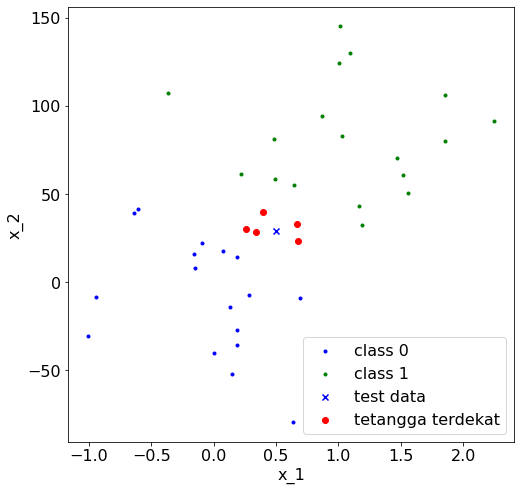

In [28]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Display data
data_class_0 = data_train[data_train["y"]==0]
data_class_1 = data_train[data_train["y"]==1]
ax.scatter(data_class_0["x_1"], data_class_0["x_2"], c='b', marker='.', label="class 0")
ax.scatter(data_class_1["x_1"], data_class_1["x_2"], c='g', marker='.', label="class 1")

# Display Test
if data_test["y"][0]==0:
    color_test = 'b'
else:
    color_test = 'g'
ax.scatter(data_test["x_1"], data_test["x_2"], marker='x', c=color_test, label="test data")

# Display Tetangga
ax.scatter(data_train["x_1"].loc[indeks_tetangga], 
           data_train["x_2"].loc[indeks_tetangga],
           marker="o",
           c = 'r', label = "tetangga terdekat")

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
# ax.axis("equal")
plt.legend()
plt.show()